# Scenario discovery - replication assignment
In this exercise, you will replicate the results from three influential papers in the field of decision-making under uncertainty. By working through these cases, you will gain hands-on experience in applying the Patient Rule Induction Method (PRIM) to identify policy vulnerabilities, develop Shared Socio-economic Pathways (SSPs), and design adaptive decision-making strategies.

Replicate the results found in:

1. [Bryant et al (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), which introduces the "scenario discovery" approach.
2. [Rozenberg et al (2014)](https://doi.org/10.1007/s10584-013-0904-3), which proposes a "backwards" approach to SSP development.
3. [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004), which presents an iterative computational model-based approach for adaptive decision-making.

The data files are in the [data](data) folder and named in line with the papers. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for these weeks. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://doi.org/10.1016/j.envsoft.2015.11.020), which gives a succinct summary of these three cases.

An additional useful, if dated, resource for Bryant et al is [Scenario discovery in Python](https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/) from the Water Programming blog.

You can use use the `%matplotlib notebook` [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) for interaction with the trade-off curves. You can revert back to inline with `%matplotlib inline`.

## 1. Bryant & Lempert
> Bryant and Lempert's ["Thinking inside the box"](https://doi.org/10.1016/j.techfore.2009.08.002) introduces "scenario discovery," a computer-assisted method for identifying policy vulnerabilities using statistical or data-mining algorithms on simulation data. The approach is demonstrated on a U.S. renewable energy policy problem, addressing challenges faced in public debates.

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the `peel_alpha` in [PRIM](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/prim.html). This controls the leniency of the algorithm.

In [2]:
from ema_workbench.analysis import prim
import pandas as pd

In [3]:
df = pd.read_csv('data/Bryant et al 2010.csv')
df.head(10)

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900002,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0
5,0.25,1,90.000000,689.799988,0.22,94.400002,0.256,-0.790,1.82,0.066,174.899994,1007,5.49,119.86,1,0
6,0.25,1,85.199997,500.600006,0.07,90.599998,0.293,-0.711,0.59,-0.018,114.199997,1008,16.83,157.92,0,0
7,0.25,1,106.099998,639.200012,0.28,90.800003,0.232,-0.378,1.86,-0.052,111.599998,1009,51.47,188.45,0,0
8,0.25,1,89.500000,802.000000,0.21,94.400002,0.402,-0.555,1.77,-0.015,141.500000,1010,20.71,116.71,0,0
9,0.25,1,85.199997,874.599976,0.74,89.500000,0.579,-0.738,0.57,-0.034,185.000000,1011,9.18,95.26,1,0


In [4]:
df.shape

(882, 16)

In [5]:
x = df.iloc[:, 2:11]
y = df.iloc[:, 15] # Greater than 90%

In [6]:
# tranform into array for PRIM (apply only for older pandas)
# APPARENTLY NOT HAHAHAHA
#x = x.to_records()
#y = y.values

In [7]:
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

## PRIM (Patient Rule Induction Method)

The peeling alpha determines how much data is peeled off in each iteration of the algorithm. The lower the value, the less data is removed in each iteration. Set the peeling alpha to 0.1.
The minimium coverage threshold that a box should meet is set to 0.8 (minimum fraction of desired outcomes in a box).

In [8]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest


[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
box1

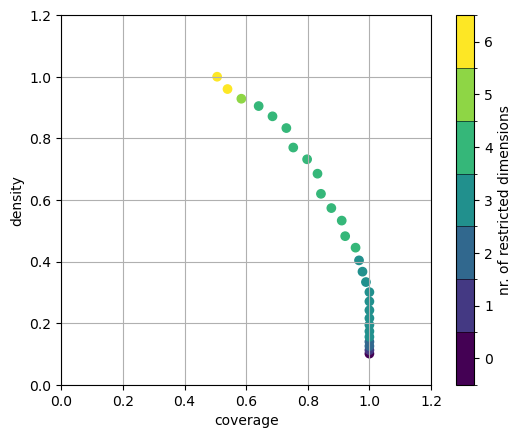

In [11]:
box1.show_tradeoff()
plt.grid(True)
plt.show()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 0.9411764705882353, mass: 0.05782312925170068, coverage: 0.5393258426966292, density: 0.9411764705882353 restricted_dimensions: 4


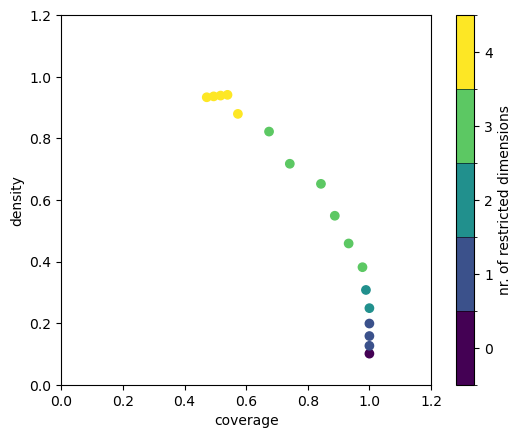

In [12]:
box2 = prim.Prim(x, y, threshold=0.8, peel_alpha=0.2).find_box()
box2.show_tradeoff()
plt.show()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 0.8636363636363636, mass: 0.07482993197278912, coverage: 0.6404494382022472, density: 0.8636363636363636 restricted_dimensions: 7


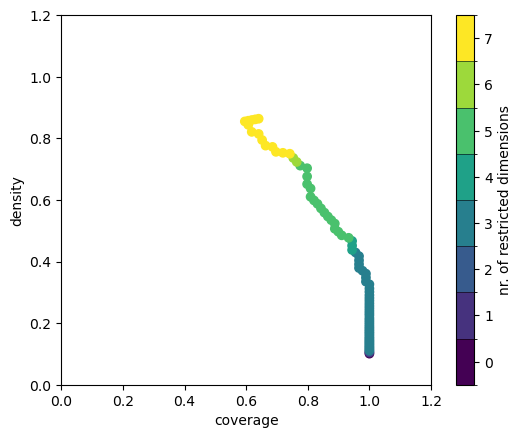

In [13]:
box3 = prim.Prim(x, y, threshold=0.8, peel_alpha=0.03).find_box()
box3.show_tradeoff()
plt.show()

In [14]:
box1.inspect(21) # choose point 21

coverage     0.752809
density      0.770115
id          21.000000
k           67.000000
mass         0.098639
mean         0.770115
n           87.000000
res_dim      4.000000
Name: 21, dtype: float64

                            box 21                                    
                               min         max      qp value  qp value
Total biomass           450.000000  755.799988           NaN  0.000005
Demand elasticity        -0.422000   -0.202000  1.184930e-16       NaN
Biomass backstop price  150.049995  199.600006  3.515113e-11       NaN
Cellulosic cost          72.650002  133.699997  1.574133e-01       NaN



[None]

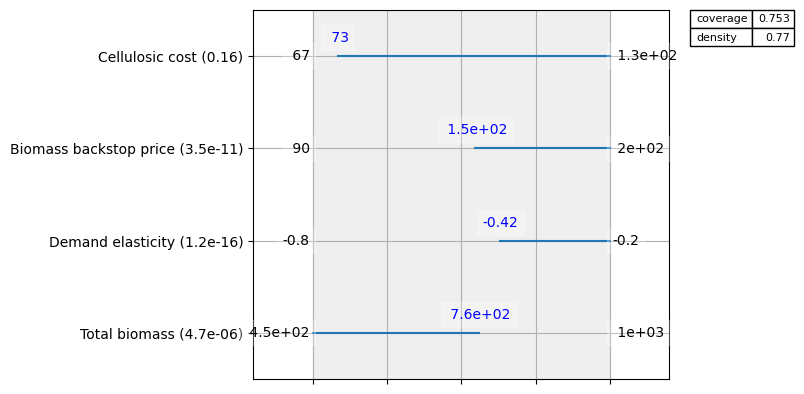

In [15]:
box1.inspect(21, style='graph')
plt.grid(True)
plt.show()

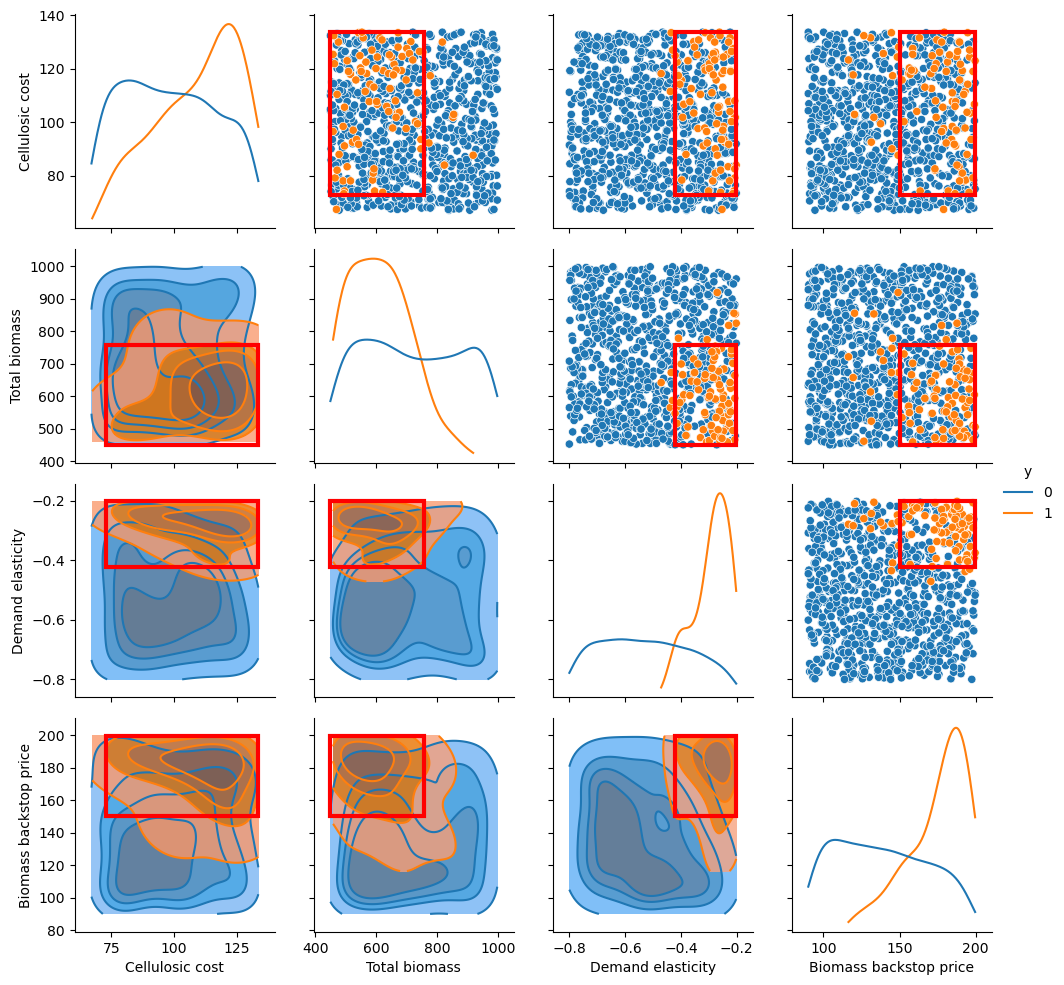

In [16]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

We have now found a first box that explains close to 80% of the cases of interest.

In [17]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 795 points remaining, containing 22 cases of interest
[MainProcess/INFO] box mean (0.3469387755102041) does not meet threshold criteria (1 0.8),returning dump box


mean = density

In [18]:
box3 = prim_alg.find_box()

[MainProcess/INFO] no data remaining, exiting


The logging will inform us in this case that no additional box can be found.

In [19]:
prim_alg.stats_to_dataframe()

,coverage,density,mass,res_dim
box 1,0.752809,0.770115,0.098639,4
box 2,0.247191,0.027673,0.901361,0


In [20]:
prim_alg.boxes_to_dataframe()

/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/scenario_discovery_util.py:929: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_boxes.loc[unc][index[i]] = values.values


box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  150.049995  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic cost          72.650002  133.699997   67.0  133.699997

- Coverage: The proportion of all favorable (or "of interest") cases that are captured by a discovered scenario
- Density: The proportion of cases within the scenario that are of interest 
- Restricted Dimensions: The number of input dimensions (i.e., features or variables) that have been constrained or "peeled" to form the current box (scenario)

For instance, the scenario covers 200 total cases (from the full 1,000 simulations), and 150 of them are relevant. This means: coverage 0.20 and density 0.75. Res dim of 4 means only 4 variables (dimensions) have been peeled (see table above).

## CART (classification and regression tree)

In [21]:
from ema_workbench.analysis import cart

In [22]:
cart_alg = cart.CART(x, y, mass_min=0.05)
# Each leaf node must contain at least 5% of the total sample weight (or total number of samples, if unweighted)
cart_alg.build_tree()

In [23]:
cart_alg.stats_to_dataframe()

,coverage,density,res dim,mass
box 1,0.011236,0.021739,2,0.052154
box 2,0.000000,0.000000,2,0.546485
box 3,0.000000,0.000000,3,0.103175
box 4,0.044944,0.090909,3,0.049887
box 5,0.224719,0.434783,2,0.052154
box 6,0.112360,0.227273,3,0.049887
box 7,0.000000,0.000000,3,0.051020
box 8,0.606742,0.642857,2,0.095238


In [24]:
cart_alg.boxes_to_dataframe()

/opt/anaconda3/envs/school/lib/python3.12/site-packages/ema_workbench/analysis/scenario_discovery_util.py:929: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_boxes.loc[unc][index[i]] = values.values


box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649998  81.649998   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   
Cellulosic cost         67.0  133.699997  67.000000  133.699997  67.000   

                                         box 4                box 5  \
                               max         min         max      min   
Cellulosic yield         99.900002   80.000000   99.900002   80.000   
Demand elasticity        -0.316500   -0.439000   -0.316500   -0.439   
Biomass backstop price  170.750000   90.000000  170.750000  170.750   
Cellulosic cost         109.200001  109.200001  133.699997   67.000   

                                      box 6                  box 7  \
                               max      min         max        min   
Cellulosic yield         99.900002  80.0000   89.049999  89.049999   
Demand elasticity        -0.316500  -0.3165   -0.202000  -0.316500   
Biomass backstop price  199.600006  90.0000  148.300003  90.000000   
Cellulosic cost         133.699997  67.0000  133.699997  67.000000   

                                         box 8              
                               max         min         max  
Cellulosic yield         99.900002   80.000000   99.900002  
Demand elasticity        -0.202000   -0.316500   -0.202000  
Biomass backstop price  148.300003  148.300003  199.600006  
Cellulosic cost         133.699997   67.000000  133.699997

PRIM produces a better description of the data.

## 2. Rozenberg et al
> In ["Building SSPs for climate policy analysis,"](https://doi.org/10.1007/s10584-013-0904-3) Rozenberg et al. propose a "backwards" approach to develop Shared Socio-economic Pathways (SSPs) using potential drivers of mitigation and adaptation challenges. The method aids in focusing storylines on the most relevant driving forces.

* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply PRIM separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM

In [25]:
data = pd.read_csv('data/Rozenberg et al 2014.csv')

In [26]:
data.head(10)

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,1,0,1,0,1,0,0,0
6,0,2,0,0,1,1,0,0,0,0,0,0
7,0,2,0,0,1,1,1,0,1,0,0,0
8,0,2,0,1,0,0,0,1,0,0,0,0
9,0,2,0,1,0,0,1,1,0,0,0,0


In [27]:
uncertainties = data.iloc[:, 0:7]

ssp_columns = {}
for i in range(1,6):
    ssp_columns[f'ssp{i}'] = data[f'SSP{i}']

In [28]:
ssp_columns

{'ssp1': 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 281    0
 282    1
 283    1
 284    0
 285    1
 Name: SSP1, Length: 286, dtype: int64,
 'ssp2': 0      0
 1      0
 2      0
 3      0
 4      1
       ..
 281    0
 282    0
 283    0
 284    0
 285    0
 Name: SSP2, Length: 286, dtype: int64,
 'ssp3': 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 281    0
 282    0
 283    0
 284    0
 285    0
 Name: SSP3, Length: 286, dtype: int64,
 'ssp4': 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 281    0
 282    0
 283    0
 284    0
 285    0
 Name: SSP4, Length: 286, dtype: int64,
 'ssp5': 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 281    0
 282    0
 283    0
 284    0
 285    0
 Name: SSP5, Length: 286, dtype: int64}

In [29]:
uncertainties

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets
0,0,2,0,0,0,0,0
1,0,2,0,0,0,0,1
2,0,2,0,0,0,1,0
3,0,2,0,0,0,1,1
4,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...
281,1,1,2,1,0,1,1
282,1,1,2,1,1,0,0
283,1,1,2,1,1,0,1
284,1,1,2,1,1,1,0


In [30]:
ssp_columns['ssp1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 286 entries, 0 to 285
Series name: SSP1
Non-Null Count  Dtype
--------------  -----
286 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


In [31]:
prim_alg1 = prim.Prim(uncertainties, ssp_columns['ssp1'], threshold=0.8, peel_alpha=0.1)
prim_alg2 = prim.Prim(uncertainties, ssp_columns['ssp2'], threshold=0.4, peel_alpha=0.1)
prim_alg3 = prim.Prim(uncertainties, ssp_columns['ssp3'], threshold=0.8, peel_alpha=0.1)
prim_alg4 = prim.Prim(uncertainties, ssp_columns['ssp4'], threshold=0.8, peel_alpha=0.1)
prim_alg5 = prim.Prim(uncertainties, ssp_columns['ssp5'], threshold=0.4, peel_alpha=0.1)

In [32]:
box1 = prim_alg1.find_box()  
box2 = prim_alg2.find_box() # 0.5 is already too big
box3 = prim_alg3.find_box() 
box4 = prim_alg4.find_box() # density is 1???
box5 = prim_alg5.find_box() # 0.5 is already too big

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest


[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.4583333333333333, mass: 0.08391608391608392, coverage: 0.5789473684210527, density: 0.4583333333333333 restricted_dimensions: 3


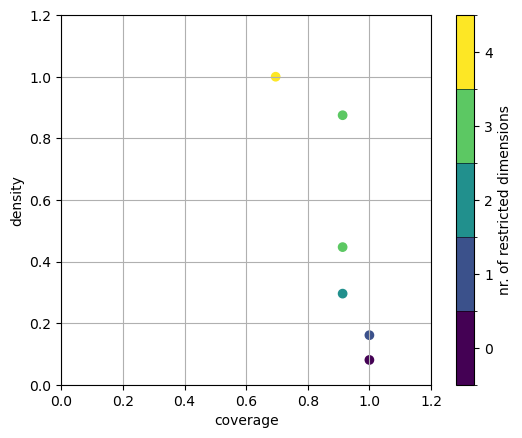

In [33]:
box4.show_tradeoff()
plt.grid(True)
plt.show()

In [34]:
prim_alg1.stats_to_dataframe()

,coverage,density,mass,res_dim
box 1,0.340909,0.9375,0.055944,4


In [35]:
prim_alg2.stats_to_dataframe()

,coverage,density,mass,res_dim
box 1,0.321429,0.5625,0.055944,4


In [36]:
prim_alg3.stats_to_dataframe()

,coverage,density,mass,res_dim
box 1,0.55,0.916667,0.083916,4


In [37]:
prim_alg4.stats_to_dataframe()

,coverage,density,mass,res_dim
box 1,0.695652,1.0,0.055944,4


In [38]:
prim_alg5.stats_to_dataframe()

,coverage,density,mass,res_dim
box 1,0.578947,0.458333,0.083916,3


## 3. Hamarat et al
> Hamarat, Kwakkel, and Pruyt's ["Adaptive Robust Design under deep uncertainty"](https://doi.org/10.1016/j.techfore.2012.10.004) presents an iterative computational model-based approach for adaptive decision-making under uncertainty. The approach combines adaptive policy-making, simulation models, data mining, and robust optimization, with potential applications in long-term structural transformations.

This is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. **Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.**

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [39]:
# To load the .gz file, you can use the load_results function
from ema_workbench import load_results

In [40]:
fn = "data/Hamarat et al 2013.gz"
x, outcomes = load_results(file_name=fn)

[MainProcess/INFO] results loaded successfully from /Users/racheldelvin/Desktop/epa141A_open/Week 3-4 - vulnerability analysis/data/Hamarat et al 2013.gz


In [41]:
x.head(3)

,SWITCH Market price determination,SWITCH TGC obligation curve,SWITCH carbon cap,SWITCH carbon price determination,SWITCH economic growth,SWITCH electrification rate,SWITCH interconnection capacity expansion,SWITCH lookup curve TGC,SWITCH low reserve margin price markup,SWITCH physical limits,...,starting construction time,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year,model,policy
0,1,2,3,2,5,1,1,2,1,2,...,0.813530,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007,energy,no policy
1,2,3,2,1,4,2,1,1,3,2,...,1.712138,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794,energy,no policy
2,1,3,1,1,3,6,4,2,4,1,...,0.390609,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390,energy,no policy


In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   SWITCH Market price determination             5000 non-null   category
 1   SWITCH TGC obligation curve                   5000 non-null   category
 2   SWITCH carbon cap                             5000 non-null   category
 3   SWITCH carbon price determination             5000 non-null   category
 4   SWITCH economic growth                        5000 non-null   category
 5   SWITCH electrification rate                   5000 non-null   category
 6   SWITCH interconnection capacity expansion     5000 non-null   category
 7   SWITCH lookup curve TGC                       5000 non-null   category
 8   SWITCH low reserve margin price markup        5000 non-null   category
 9   SWITCH physical limits                        5000 n

In [43]:
outcomes.keys()

dict_keys(['fraction renewables', 'carbon emissions reduction fraction', 'TIME'])

In [44]:
outcomes

{'fraction renewables': array([[0.31618923, 0.31619009, 0.31619254, ..., 0.26765659, 0.26730603,
         0.26695362],
        [0.31508598, 0.31508735, 0.31509113, ..., 0.44931963, 0.44940147,
         0.44947988],
        [0.31839272, 0.31839353, 0.31839618, ..., 0.59941703, 0.59934622,
         0.59928203],
        ...,
        [0.31783172, 0.3178325 , 0.31783482, ..., 0.49547905, 0.49593133,
         0.49639055],
        [0.31375358, 0.31375462, 0.31375748, ..., 0.38203168, 0.3821263 ,
         0.38222334],
        [0.31789917, 0.3179003 , 0.31790349, ..., 0.31051478, 0.3102605 ,
         0.31000748]]),
 'carbon emissions reduction fraction': array([[ 0.00000000e+00,  1.04782416e-07,  8.13436031e-07, ...,
         -2.41059136e+00, -2.42725468e+00, -2.44397616e+00],
        [ 0.00000000e+00,  1.24736871e-07,  9.49939306e-07, ...,
          3.99437845e-01,  3.99044961e-01,  3.98631543e-01],
        [ 0.00000000e+00,  8.85316993e-08,  7.05202467e-07, ...,
          8.25306237e-01,  8.2

In [45]:
summary = {k: v[:, -1] for k, v in outcomes.items()}

# convert to DataFrame and describe
df = pd.DataFrame(summary)
df.describe()

,fraction renewables,carbon emissions reduction fraction,TIME
count,5000.000000,5000.000000,5000.0
mean,0.395101,-0.135113,2050.0
std,0.086880,0.977872,0.0
min,0.143118,-5.782022,2050.0
25%,0.335342,-0.373761,2050.0
50%,0.387465,0.195430,2050.0
75%,0.446777,0.524266,2050.0
max,0.796404,0.981407,2050.0


In [46]:
# specify y
# Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.
y = outcomes['fraction renewables'][:, 0] > outcomes['fraction renewables'][:, -1]

In [47]:
y

array([ True, False, False, ..., False, False,  True])

In [48]:
# convert categorical variables to int 
x = x.astype({col: float for col in x.columns[:12]}) # col 0-11

In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   SWITCH Market price determination             5000 non-null   float64 
 1   SWITCH TGC obligation curve                   5000 non-null   float64 
 2   SWITCH carbon cap                             5000 non-null   float64 
 3   SWITCH carbon price determination             5000 non-null   float64 
 4   SWITCH economic growth                        5000 non-null   float64 
 5   SWITCH electrification rate                   5000 non-null   float64 
 6   SWITCH interconnection capacity expansion     5000 non-null   float64 
 7   SWITCH lookup curve TGC                       5000 non-null   float64 
 8   SWITCH low reserve margin price markup        5000 non-null   float64 
 9   SWITCH physical limits                        5000 n

## PRIM only

In [50]:
ema_logging.log_to_stderr(ema_logging.INFO);

prim_alg = prim.Prim(x, y, threshold=0.5, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.6521739130434783, mass: 0.0506, coverage: 0.1894374282433984, density: 0.6521739130434783 restricted_dimensions: 12


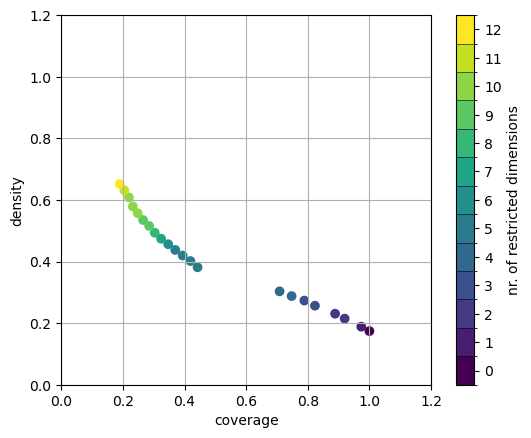

In [51]:
box1.show_tradeoff()
plt.grid(True)
plt.show()

In [52]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

## PRIM PCA

In [53]:
rotated_experiments, rotation_matrix = prim.pca_preprocess(experiments=x, y=y, exclude=['model', 'policy'])

In [54]:
rotated_experiments.head(3)

,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,...,r_36,r_37,r_38,r_39,r_40,r_41,r_42,r_43,r_44,r_45
0,0.247828,2.356101,-1.494152,-0.481247,0.092315,-0.832990,-1.210858,-0.709042,0.456215,-2.077937,...,0.992740,-0.378137,-0.794161,0.615570,0.214069,-0.592973,-1.233320,0.172486,0.885730,-0.837756
1,0.725583,1.640694,-0.730170,0.152679,-0.748142,1.610776,-0.281735,-0.727059,1.041966,-0.113074,...,-2.026889,0.614732,-0.154859,0.729928,0.799983,-0.685799,-0.683506,0.567818,-1.366139,1.302721
2,-1.199650,0.837320,-0.010282,-0.279713,0.873090,-0.484108,-1.423175,-0.282806,-0.736365,-0.139136,...,1.595649,-0.536136,-1.153282,0.368233,0.773221,1.250982,1.773089,1.229583,1.547992,0.003684


In [55]:
rotation_matrix.head(3)

,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,...,r_36,r_37,r_38,r_39,r_40,r_41,r_42,r_43,r_44,r_45
SWITCH Market price determination,0.140566,-0.216966,-0.121136,-0.193170,0.078788,0.102999,0.407348,-0.017635,-0.183000,0.026726,...,-0.025233,0.290337,-0.028185,0.044524,0.053150,-0.068214,-0.083574,0.377955,-0.129403,0.174554
SWITCH TGC obligation curve,0.261901,0.194520,0.113309,-0.104664,-0.200071,-0.111286,-0.093828,-0.118081,0.156062,0.159296,...,-0.096184,0.186267,0.054192,0.048854,0.046817,-0.167636,0.204656,-0.028958,-0.094507,-0.001081
SWITCH carbon cap,0.243546,-0.123011,-0.103986,-0.136614,-0.305611,0.035172,-0.155523,-0.035259,0.030847,-0.158316,...,-0.083343,0.053072,0.165738,-0.291707,0.020428,-0.045196,-0.014966,-0.019664,0.211828,-0.094211


In [56]:
# perform prim on modified results tuple
prim_obj = prim.Prim(rotated_experiments, y, threshold=0.8)
box = prim_obj.find_box()

[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.8736842105263158, mass: 0.057, coverage: 0.28587830080367393, density: 0.8736842105263158 restricted_dimensions: 19


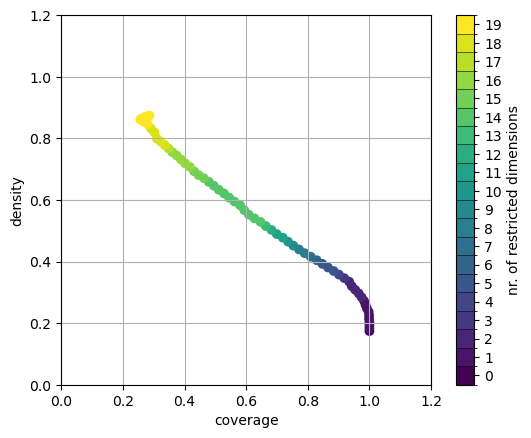

In [57]:
box.show_tradeoff()
plt.grid(True)
plt.show()

In [58]:
box.inspect_tradeoff()

alt.VConcatChart(...)

In [59]:
box.inspect(50)

coverage      0.335247
density       0.778667
id           50.000000
k           292.000000
mass          0.075000
mean          0.778667
n           375.000000
res_dim      18.000000
Name: 50, dtype: float64

        box 50                                  
           min       max  qp value      qp value
r_45 -3.500650 -0.347613       NaN  2.136039e-47
r_32 -3.356808  1.286964       NaN  5.238510e-02
r_27 -4.012541  1.715233       NaN  1.046574e-01
r_36 -3.123062  1.172096       NaN  1.149757e-01
r_33 -3.105988  1.613627       NaN  2.117696e-01
r_35 -3.587925  1.535964       NaN  3.224915e-01
r_43 -0.848951  3.616652  0.000484           NaN
r_39 -1.625251  1.559137  0.150754  2.280689e-01
r_38 -1.234182  3.938121  0.157788           NaN
r_37 -1.700966  1.606683  0.193970  2.711254e-01
r_44 -1.516380  1.184890  0.194998  4.640501e-02
r_25 -1.775955  1.714853  0.282327  2.026793e-01
r_31 -1.597862  3.996351  0.291523           NaN
r_18 -1.546597  3.602314  0.322491           NaN
r_42 -

[None]

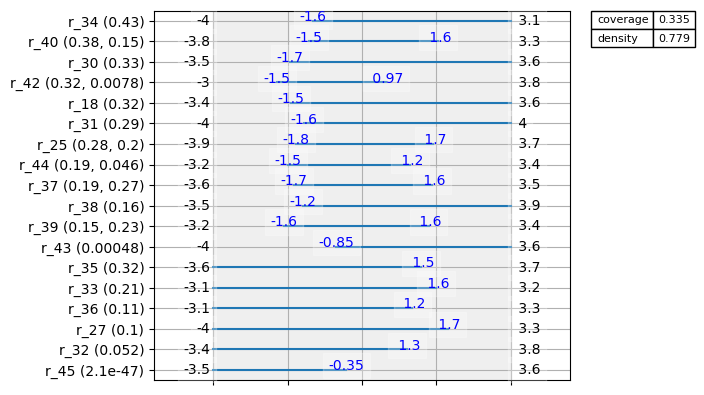

In [60]:
box.inspect(50, style='graph')
plt.grid(True)
plt.show()

In [61]:
#box.show_pairs_scatter()